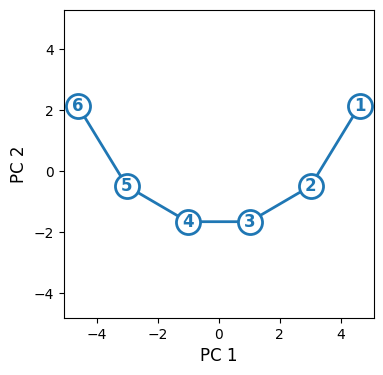

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the number of objects and dimensions


def generate_data_adjusted(num_objects, num_dimensions, num_encoded_per_dim):
    """
    Generate data based on adjusted encoding rule.
    
    Parameters:
    - num_objects: Total number of objects.
    - num_dimensions: Total number of dimensions.
    - num_encoded_per_dim: Number of objects to encode per dimension.
    
    Returns:
    - data: Encoded data matrix.
    """
    # Initialize an array to store the data
    data = np.zeros((num_objects, num_dimensions))
    
    # Fill in the data according to the adjusted encoding rule
    for dim in range(num_dimensions):
        # Determine which objects are encoded in the current dimension
        for rank in range(num_encoded_per_dim):
            obj = dim + 1 - rank  # Adjust starting object based on dimension
            if 1 <= obj <= num_objects:
                data[obj - 1, dim] = obj - 3.5 #num_encoded_per_dim - rank
                
    return data

# Example usage
num_objects = 6

num_encoded_per_dim = 6 # Adjust the number of objects to encode per dimension
num_dimensions = num_objects+num_encoded_per_dim-1
# Generate the data
data = generate_data_adjusted(num_objects, num_dimensions, num_encoded_per_dim)
# data = data[:,1:-1]

# Perform PCA to reduce dimensions from 10 to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plot the PCA results in 2D
plt.figure(figsize=(4,4))
plot_data = np.zeros((2,len(data_pca)))
for i, (x, y) in enumerate(data_pca):
    plt.scatter(x, y, s=300, color='white', edgecolor='tab:blue', linewidths=2,zorder=1)  # Large white circles
    plt.text(x, y, f'{i + 1}', ha='center', va='center', fontsize=12, fontweight='bold', color='tab:blue', zorder=2)  # Bold object index
    plot_data[0,i]=x
    plot_data[1,i]=y
plt.plot(plot_data[0],plot_data[1],zorder=0,color='tab:blue', lw=2)
# Set titles and labels with consistent font size
# plt.title("2D Visualization of 12 Objects Using PCA", fontsize=12)
plt.xlabel("PC 1", fontsize=12)
plt.ylabel("PC 2", fontsize=12)
plt.axis('equal')
# plt.title()
plt.show()


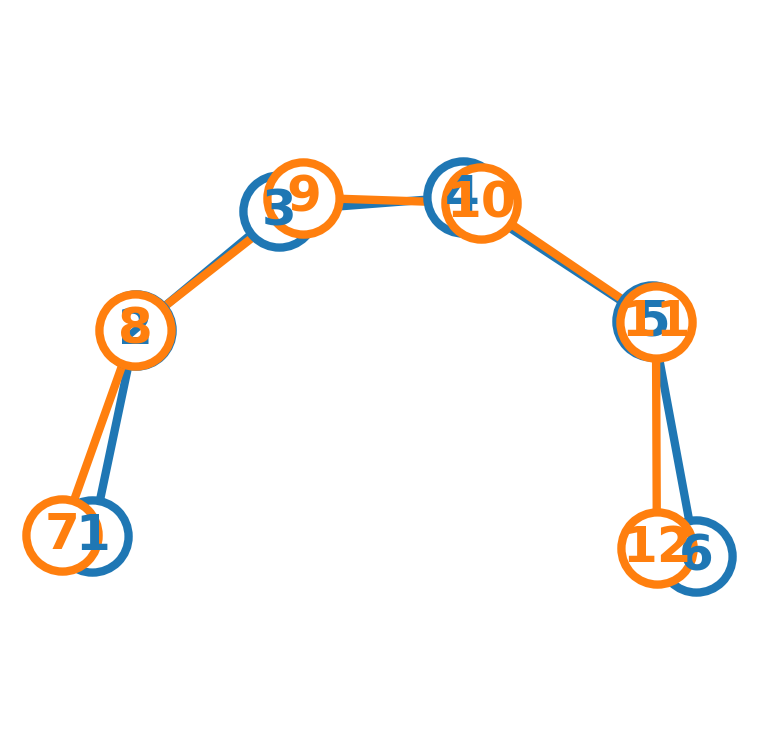

In [82]:
num_objects = 6

num_encoded_per_dim = 12 # Adjust the number of objects to encode per dimension
num_dimensions = num_objects+num_encoded_per_dim-1
# Generate the data
data = np.array([[1., 1., 1., 1., 0., 0., 0., 0., 0.,-2],
                 [0., 1., 1., 1., 1., 0., 0., 0., 0.,-1],
                 [0., 0., 1., 1., 1., 1., 0., 0., 0.,-0],
                 [0., 0., 0., 1., 1., 1., 1., 0., 0.,1],
                 [0., 0., 0., 0., 1., 1., 1., 1., 0.,2],
                 [0., 0., 0., 0., 0., 1., 1., 1., 1.,3],
                 [1., 1., 1., 1., 0., 0., 0., 0., 0.,-2],
                 [0., 1., 1., 1., 1., 0., 0., 0., 0.,-1],
                 [0., 0., 1., 1., 1., 1., 0., 0., 0.,0],
                 [0., 0., 0., 1., 1., 1., 1., 0., 0.,1],
                 [0., 0., 0., 0., 1., 1., 1., 1., 0.,2],
                 [0., 0., 0., 0., 0., 1., 1., 1., 1.,3]])
data[:,-1]*=0.
# data = np.array([[1., 0., 0., 0.],
#                  [1., 1., 0., 0.],
#                  [1., 1., 1., 0.],
#                  [0., 1., 1., 1.],
#                  [0., 0., 1., 1.],
#                  [0., 0., 0., 1.],
#                  [1., 0., 0., 0.],
#                  [1., 1., 0., 0.],
#                  [1., 1., 1., 0.],
#                  [0., 1., 1., 1.],
#                  [0., 0., 1., 1.],
#                  [0., 0., 0., 1.],])
data+= np.random.randn(data.shape[0], data.shape[1])*0.05
# Perform PCA to reduce dimensions from 10 to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca[:,1]*=-1
data_pca[:,0]*=-1
# Plot the PCA results in 2D
plt.figure(figsize=(3,3), dpi=300)
plot_data = np.zeros((2,len(data_pca)))
# for i, (x, y) in enumerate(data_pca):
#     plt.scatter(x, y, s=300, color='white', edgecolor='tab:blue', linewidths=2,zorder=1)  # Large white circles
#     plt.text(x, y, f'{i + 1}', ha='center', va='center', fontsize=12, fontweight='bold', color='tab:blue', zorder=2)  # Bold object index
#     plot_data[0,i]=x
#     plot_data[1,i]=y
# plt.plot(plot_data[0],plot_data[1],zorder=0,color='tab:blue', lw=2)
for i, (x, y) in enumerate(data_pca):
    if i <6:
        plt.scatter(x, y, s=300, color='white', edgecolor='tab:blue', linewidths=2,zorder=1, clip_on=False)  # Large white circles
        plt.text(x, y, f'{i + 1}', ha='center', va='center', fontsize=12, fontweight='bold', color='tab:blue', zorder=2)  # Bold object index
    else:
        plt.scatter(x, y, s=300, color='white', edgecolor='tab:orange', linewidths=2,zorder=1, clip_on=False)  # Large white circles
        plt.text(x, y, f'{i + 1}', ha='center', va='center', fontsize=12, fontweight='bold', color='tab:orange', zorder=2)
    plot_data[0,i]=x
    plot_data[1,i]=y

plt.plot(plot_data[0][:6],plot_data[1][:6],zorder=0,color='tab:blue', lw=2)
plt.plot(plot_data[0][6:],plot_data[1][6:],zorder=0,color='tab:orange', lw=2)
# Set titles and labels with consistent font size
# plt.title("2D Visualization of 12 Objects Using PCA", fontsize=12)
plt.xlabel("PC 1", fontsize=12)
plt.ylabel("PC 2", fontsize=12)
plt.axis('equal')
# plt.title()
plt.axis('off')
plt.show()

In [62]:
from scipy.spatial.distance import cdist

def plot_heat_map(output1, output2, max_v, plot=True):
    # Correct the labels for the axis to include '6', 'F'
    labels = ['1', '2', '3', '4', '5', '6', '1', '2', '3', '4', '5', '6']

    # Since we added two more labels, we need to regenerate the data and distances
    # Generate random data for 12 points with 100 dimensions
    all_data_corrected = np.concatenate((output1, output2), axis=1)

    # Compute pairwise L2 (Euclidean) distance matrix for the corrected data
    distances_corrected = cdist(all_data_corrected.T, all_data_corrected.T, 'euclidean')
    max_v = np.max(distances_corrected)
    # Set the distances on the main diagonal to zero for the corrected data
    np.fill_diagonal(distances_corrected, 0)
    if plot:
        # Plotting the heatmap with the corrected settings
        fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
        heatmap_corrected = ax.imshow(distances_corrected, cmap='inferno', origin='upper',vmin=0,vmax=max_v)

        # Adding color bar on the side
        cbar = fig.colorbar(heatmap_corrected, ticks=[0, max_v])
        cbar.set_label('L2 distance', rotation=270, labelpad=20)#, labelpad=-20)

        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Apply custom styling for each label
        for index, label in enumerate(labels):
            if index < 6:  # First 6 indexes
                color = 'tab:blue'
            else:  # Last 6 indexes
                color = 'tab:orange'

            # Set custom x-axis labels
            ax.text(index, 12, label, va='center', ha='center', color=color, fontweight='bold')

            # Set custom y-axis labels (considering the reversed axis)
            ax.text(-1, index, label, va='center', ha='right', color=color, fontweight='bold')



        # Turning off the grid
        ax.grid(False)

        # Show the plot
        plt.show()
        print(distances_corrected.max())
    else:
        return distances_corrected.max()

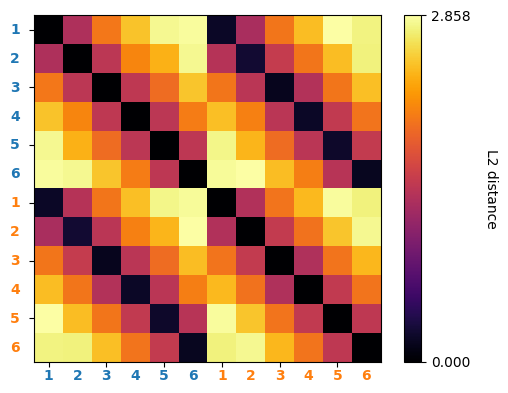

2.8577200025078957


In [63]:
plot_heat_map(data[:6].T,data[6:].T,3.5)

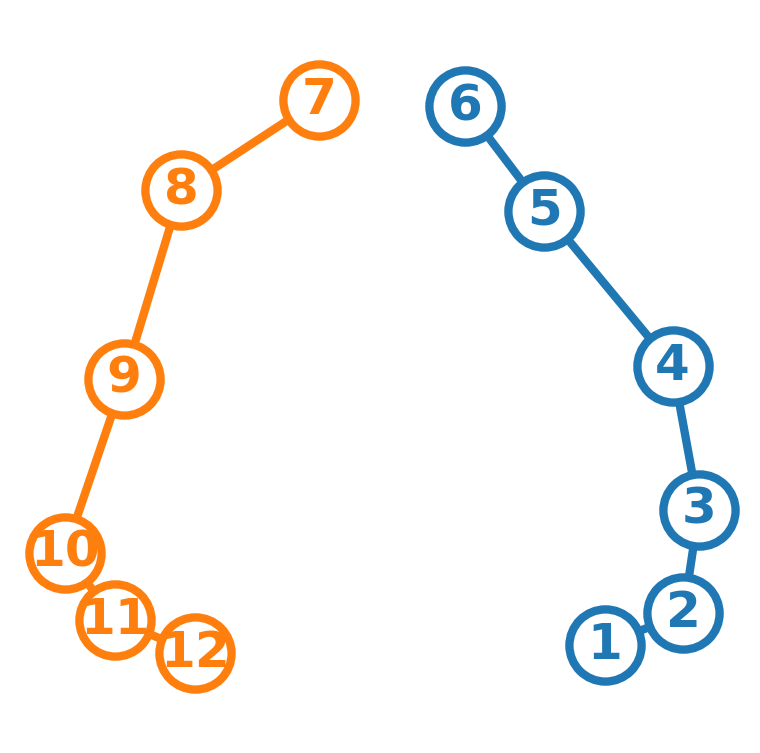

In [132]:
num_objects = 12

num_encoded_per_dim = 12 # Adjust the number of objects to encode per dimension
num_dimensions = num_objects+num_encoded_per_dim-1
# Generate the data
data = np.array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -4],
                 [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., -2],
                 [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., -1],
                 [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., -0.5],
                 [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., -0.25],
                 [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., -0.125],
                 [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.125],
                 [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.25],
                 [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.5],
                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1],
                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 2],
                 [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 4]])
data[:,-1]*=0.
# data = np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
#                  [1., 1., 0., 0., 0., 0., 0., 0., 0.],
#                  [1., 1., 1., 0., 0., 0., 0., 0., 0.],
#                  [0., 1., 1., 1., 0., 0., 0., 0., 0.],
#                  [0., 0., 1., 1., 1., 0., 0., 0., 0.],
#                  [0., 0., 0., 1., 1., 1., 0., 0., 0.],
#                  [0., 0., 0., 0., 1., 1., 1., 0., 0.],
#                  [0., 0., 0., 0., 0., 1., 1., 1., 0.],
#                  [0., 0., 0., 0., 0., 0., 1., 1., 1.],
#                  [0., 0., 0., 0., 0., 0., 0., 1., 1.],
#                  [0., 0., 0., 0., 0., 0., 0., 0., 1.]])
# # data[data!=0]-=1.98
data+= np.random.randn(data.shape[0], data.shape[1])*0.05
# # Perform PCA to reduce dimensions from 10 to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca[:,1]*=-1
# data_pca[:,0]*=-1
# Plot the PCA results in 2D
plt.figure(figsize=(3,3), dpi=300)
plot_data = np.zeros((2,len(data_pca)))

for i, (x, y) in enumerate(data_pca):
    x = -x
    y = -y
    if i <6:
        plt.scatter(x, y, s=300, color='white', edgecolor='tab:blue', linewidths=2,zorder=1, clip_on=False)  # Large white circles
        plt.text(x, y, f'{i + 1}', ha='center', va='center', fontsize=12, fontweight='bold', color='tab:blue', zorder=2)  # Bold object index
    else:
        plt.scatter(x, y, s=300, color='white', edgecolor='tab:orange', linewidths=2,zorder=1, clip_on=False)  # Large white circles
        plt.text(x, y, f'{i + 1}', ha='center', va='center', fontsize=12, fontweight='bold', color='tab:orange', zorder=2)
    plot_data[0,i]=x
    plot_data[1,i]=y

plt.plot(plot_data[0][:6],plot_data[1][:6],zorder=0,color='tab:blue', lw=2)
plt.plot(plot_data[0][6:],plot_data[1][6:],zorder=0,color='tab:orange', lw=2)
# Set titles and labels with consistent font size
# plt.title("2D Visualization of 12 Objects Using PCA", fontsize=12)
plt.xlabel("PC 1", fontsize=12)
plt.ylabel("PC 2", fontsize=12)
plt.axis('equal')
plt.axis('off')
# plt.title()
plt.show()

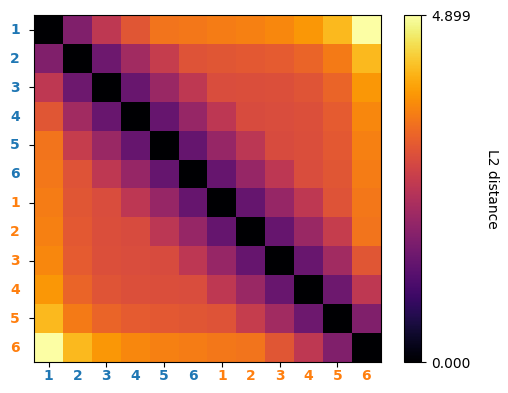

4.898979485566356


In [79]:
plot_heat_map(data[:6].T,data[6:].T,3.5)